**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Introducción al Aprendizaje profundo**

*Edición 2023*

----

# Trabajo práctico entregable

Dado el dataset que busca predecir la [presencia o ausencia de Diabetes](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data?select=diabetes_binary_5050split_health_indicators_BRFSS2015.csv).

## Ejercicio 2 - Implementar modelo básico

Implementar una red neuronal simple con parámetros por defaults (este será su baseline).

----

### Imports y lectura de datasets

In [1]:
import tqdm
import torch

import pandas as pd
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

In [2]:
# Configuración del dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

#### Lectura del Dataset

In [3]:
data = pd.read_csv('datasets/diabetes.csv')
data.shape

(70692, 22)

In [4]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


#### Atributos del dataset

* **Diabetes_binary**: (Alguna vez le dijeron) que tiene diabetes?.
* **HighBP**: Adults who have been told they have *high blood pressure* by a doctor, nurse, or other health professional .
* **HighChol**: Adults who have been told they have *high cholesterol* by a doctor, nurse, or other health professional .
* **CholCheck**: Cholesterol check within past five years.
* **BMI**: BMI (Body Mass Index) is a measure of body fat based on weight and height.
        Higher BMI values are linked to a higher risk of diabetes. The range of BMI in the dataset
        is from 10.16 to 71.55. BMI less than 18.5 is underweight, 18.5-24.9 is normal, 25-29.9
        is overweight, and 30 or more is obese.
* **Smoker**: Have you smoked at least 100 cigarettes in your entire life?.
* **Stroke**: (Ever told) you had a stroke.
* **HeartDiseaseorAttack**: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
* **PhysActivity**: dults who reported doing physical activity or exercise during the past 30 days other than their regular job.
* **Fruits**: Consume Fruit 1 or more times per day.
* **Veggies**: Consume Vegetables 1 or more times per day.
* **HvyAlcoholConsump**: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week).
* **AnyHealthcare**: Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service?.
* **NoDocbcCost**: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?.
* **GenHlth**: Would you say that in general your health is?.
* **MentHlth**: Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?.
* **PhysHtlt**: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?.
* **DiffWalk**: Do you have serious difficulty walking or climbing stairs?.
* **Sex**: Indicate sex of respondent.
* **Age**: Fourteen-level age category.
* **Education**: What is the highest grade or year of school you completed?.
* **Income**: Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.")

### Curación del dataset

Tal como se mencionó en el ejercicio anterior, los datos ya están imputados sin datos faltantes, limpios, balanceados y codificados aquellos que pueden ser categóricos. Lo único que resta para tratar los datos es ***estandarizarlos***, de esta forma evitamos que alguna de las variables tenga mayor ponderación a la hora de entrenar los modelos.

Antes de estandarizar el dataset, se separará la variable objetivo **Diabetes_binary** del resto de los features, ya que es la variable a predecir.

In [5]:
y = data.Diabetes_binary
X = data.drop('Diabetes_binary', axis=1)
X.shape, y.shape

((70692, 21), (70692,))

In [6]:
from sklearn.preprocessing import StandardScaler

column_names = X.columns

# Entrenamiento de scalers con los datos
scaler = StandardScaler().fit(X)

# Escalamiento de datos
std_data = pd.DataFrame(scaler.transform(X),
                              columns=column_names)

In [7]:
std_data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.880201,-1.052798,0.159276,-0.542176,-0.951711,-0.257473,-0.41647,0.649925,-1.255371,0.517485,...,0.217175,-0.321945,0.146304,0.153020,2.404008,-0.581554,1.090046,-1.607237,1.048562,1.05816
1,0.880201,0.949850,0.159276,-0.542176,1.050740,3.883895,-0.41647,-1.538638,0.796577,-1.932424,...,0.217175,-0.321945,0.146304,-0.460058,-0.577451,-0.581554,1.090046,1.197681,1.048562,1.05816
2,-1.136104,-1.052798,0.159276,-0.542176,-0.951711,-0.257473,-0.41647,0.649925,0.796577,0.517485,...,0.217175,-0.321945,-1.649743,-0.460058,0.416369,-0.581554,1.090046,1.548296,1.048562,1.05816
3,0.880201,0.949850,0.159276,-0.261036,1.050740,-0.257473,-0.41647,0.649925,0.796577,0.517485,...,0.217175,-0.321945,0.146304,-0.460058,-0.279305,-0.581554,1.090046,0.847066,1.048562,1.05816
4,-1.136104,-1.052798,0.159276,-0.120466,1.050740,-0.257473,-0.41647,0.649925,0.796577,0.517485,...,0.217175,-0.321945,-0.751719,-0.460058,-0.577451,-0.581554,-0.917392,-0.204778,0.076814,1.05816


### Guardado de datasets

Con el objetivo de entrenar futuros modelos con el dataset estandarizado, se exporta el dataset resultante.

In [8]:
# Creación de carpeta contenedora
import os

container_dir = './datasets'
if not os.path.exists(container_dir):
    os.mkdir(container_dir)

In [9]:
# Guardado de dataset estandarizado
std_data.to_csv(os.path.join(container_dir, 'std_data.csv'), index=None)

# Guardado de variable objetivo
y.to_csv(os.path.join(container_dir, 'obj_data.csv'), index=None)

### División del dataset

Dividimos aleatoriamente los datos en 80% para ***entrenamiento*** y 20% para ***test***. Del 20% de los datasets de *test* los dividiremos en partes iguales para ***test*** y ***validación***. 

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X.values, y.values,
                                                    train_size=0.8, random_state=0)
X_train.shape, X_temp.shape, y_train.shape, y_temp.shape

((56553, 21), (14139, 21), (56553,), (14139,))

In [11]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp,
                                                test_size=0.5, random_state=0)
X_val.shape, X_test.shape, y_val.shape, y_test.shape

((7069, 21), (7070, 21), (7069,), (7070,))

Una vez separados los datasets, es necesario convertir los datos en ***tensores*** de *PyTorch*.

In [12]:
X_train = torch.Tensor(X_train)
y_train = torch.LongTensor(y_train)

X_val = torch.Tensor(X_val)
y_val = torch.LongTensor(y_val)

X_test = torch.Tensor(X_test)
y_test = torch.LongTensor(y_test)

### Planteo del modelo

En esta primera aproximación se definirá un modelo básico y simple de red neuronal, el la cual entrenaremos, evaluaremos y utilizaremos para hacer predicciones.

In [13]:
class BaselineModel(nn.Module):
    def __init__(self,
                 input_features = 21, # Cantidad de features de entrada
                 hidden_layer_1 = 8, # Cantidad de neuronas de la primera capa oculta
                 hidden_layer_2 = 9, # Cantidad de neuronas de la segunda capa oculta
                 output_features = 2 # Dimensión de la salida
                 ):
        super().__init__() # Llama al método __init__ de la clase nn.Module
        # Generamos una red con 3 capas lineales (la última es de salida)
        self.fully_connected_1 = nn.Linear(input_features, hidden_layer_1)
        self.fully_connected_2 = nn.Linear(hidden_layer_1, hidden_layer_2)
        self.output = nn.Linear(hidden_layer_2, output_features)

    # Foward pass
    def forward(self, x):
        x = F.relu(self.fully_connected_1(x))
        x = F.relu(self.fully_connected_2(x))
        x = self.output(x)
        return x

In [14]:
# Definimos una semilla para hacer que el entrenamiento sea reproducible
torch.manual_seed(0)

# Instanciamos la clase
model = BaselineModel()

# Función de loss para problemas multi-clase
# En el caso de nn.CrossEntropyLoss() la función
# softmax ya está implícitamente incluida por pytorch
criterion = nn.CrossEntropyLoss() # Función de loss para problemas multi-clase

# Definimos el optimizador Adam
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

model.parameters

<bound method Module.parameters of BaselineModel(
  (fully_connected_1): Linear(in_features=21, out_features=8, bias=True)
  (fully_connected_2): Linear(in_features=8, out_features=9, bias=True)
  (output): Linear(in_features=9, out_features=2, bias=True)
)>

### Entrenamiento del modelo base



In [15]:
# Cada epoch representa un entrenamiento completo sobre el dataset
epochs = 10000

train_losses = []
val_losses = []

for epoch in tqdm.trange(epochs):
    epoch+=1

    # Forward pass y obtener la predicción
    y_pred = model.forward(X_train)

    # Calcular la loss de cada época
    loss_train = criterion(y_pred, y_train)
    train_losses.append(loss_train.item())

    # Logueamos resultados cada 10 épocas
    if epoch%1000 == 1:
       print(f'epoch: {epoch:2}  loss: {loss_train.item():10.8f}')

    # optimizer.zero_grad() Reinicia todos los gradientes, sino se acumulan
    # y estaríamos usando valores de gradiente que ya usamos previamente
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step() #Actualiza todos los parámetros del modelo (pesos y biases)

    with torch.no_grad():
        # Forward pass y obtener la predicción
        y_pred_val = model.forward(X_val)

        # Calcular la loss de cada época
        loss_val = criterion(y_pred_val, y_val)
        val_losses.append(loss_val.item())

  1%|          | 58/10000 [00:00<00:34, 287.54it/s]

epoch:  1  loss: 0.72434175


 10%|█         | 1033/10000 [00:03<00:27, 322.68it/s]

epoch: 1001  loss: 0.69313538


 21%|██        | 2062/10000 [00:06<00:25, 314.38it/s]

epoch: 2001  loss: 0.69313538


 31%|███       | 3056/10000 [00:09<00:22, 306.60it/s]

epoch: 3001  loss: 0.69313538


 41%|████      | 4059/10000 [00:13<00:19, 298.75it/s]

epoch: 4001  loss: 0.69313538


 50%|█████     | 5044/10000 [00:16<00:17, 279.65it/s]

epoch: 5001  loss: 0.69313538


 61%|██████    | 6061/10000 [00:20<00:13, 301.61it/s]

epoch: 6001  loss: 0.69313526


 70%|███████   | 7031/10000 [00:23<00:11, 266.61it/s]

epoch: 7001  loss: 0.69313794


 80%|████████  | 8042/10000 [00:27<00:06, 280.07it/s]

epoch: 8001  loss: 0.69313538


 90%|█████████ | 9034/10000 [00:30<00:03, 274.21it/s]

epoch: 9001  loss: 0.69313961


100%|██████████| 10000/10000 [00:33<00:00, 295.29it/s]


### Análisis de métricas

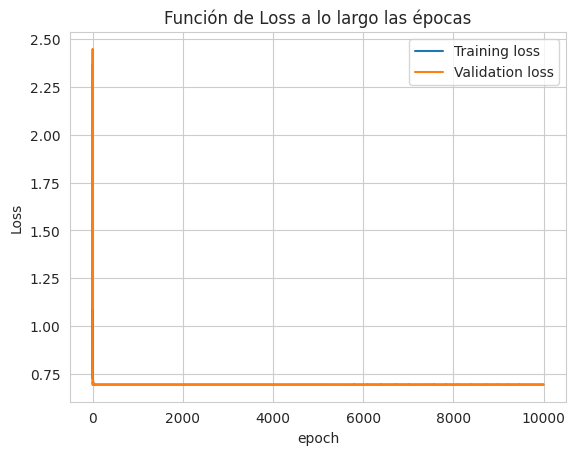

In [16]:
plt.title('Función de Loss a lo largo las épocas')
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

En esta gráfica de función ***Loss*** observamos cómo los valores se disparan al comienzo del entrenamiento y rápidamente se estabilizan en un valor cercano a **0.75**.

### Guardado del modelo

Con el objetivo de comparar o reutilizar el modelo en futuros análisis, se lo exporta como archivo `.pt`.

In [17]:
# Creación de carpeta contenedora
import os

container_dir = './models'
if not os.path.exists(container_dir):
    os.mkdir(container_dir)

In [19]:
# Guardado de modelo base
torch.save(model.state_dict(), os.path.join(container_dir, 'baseline_model.pt'))